In [1]:
# Answer to 1.1

In [2]:
import pandas as pd

raw_Jan = pd.read_csv('raw-january.csv',  encoding = 'ISO-8859-1')
raw_June = pd.read_csv('raw-june.csv',  encoding = 'ISO-8859-1')


In [3]:
# Compute trip duration by converting strings to datetime objects, then convert seconds into minutes

raw_Jan_dropoff_dt = pd.to_datetime(raw_Jan['dropoff_datetime'], format = '%d/%m/%y %H:%M')
raw_Jan_pickup_dt = pd.to_datetime(raw_Jan['pickup_datetime'], format = '%d/%m/%y %H:%M')
raw_June_dropoff_dt = pd.to_datetime(raw_June['dropoff_datetime'], format = '%d/%m/%y %H:%M')
raw_June_pickup_dt = pd.to_datetime(raw_June['pickup_datetime'], format = '%d/%m/%y %H:%M')

Jan_duration = (raw_Jan_dropoff_dt - raw_Jan_pickup_dt).dt.total_seconds()/60
June_duration = (raw_June_dropoff_dt - raw_June_pickup_dt).dt.total_seconds()/60


# Create the column 'Duration'

Jan_dataframe = pd.DataFrame({'Duration':Jan_duration})
June_dataframe = pd.DataFrame({'Duration':June_duration})


# Merge the column 'Duration' and the three columns sliced from raw data

Jan_dataframe = Jan_dataframe.merge(right = raw_Jan.ix[:,2:], left_index = True, right_index = True)
June_dataframe = June_dataframe.merge(right = raw_June.ix[:,2:], left_index = True, right_index = True)

# Rename the columns
Jan_dataframe.columns = ['Duration', 'Trip_distance', 'Passenger_count', 'Payment_amount']
Jan_dataframe.columns.names = ['Index']
June_dataframe.columns = ['Duration', 'Trip_distance', 'Passenger_count', 'Payment_amount']
June_dataframe.columns.names = ['Index']

In [4]:
# Dataframe for January

Jan_dataframe

Index,Duration,Trip_distance,Passenger_count,Payment_amount
0,3.0,0.56,1,5.80
1,19.0,3.55,1,20.16
2,4.0,0.60,1,6.30
3,9.0,3.20,2,12.30
4,13.0,2.64,3,12.80
5,18.0,3.53,1,16.80
6,20.0,6.44,1,28.99
7,21.0,15.75,1,53.80
8,33.0,6.90,3,27.80
9,21.0,4.71,2,19.80


In [5]:
# Dataframe for June

June_dataframe

Index,Duration,Trip_distance,Passenger_count,Payment_amount
0,14.0,3.04,1,13.30
1,6.0,1.68,3,10.38
2,14.0,3.39,1,17.16
3,25.0,6.30,1,24.30
4,7.0,2.24,2,9.80
5,10.0,1.39,1,9.80
6,8.0,1.84,1,9.80
7,20.0,6.66,1,27.80
8,8.0,1.20,1,10.55
9,15.0,3.95,1,18.36


In [6]:
# Answer to 1.2

In [7]:
# get mean data of different columns

mean_jan_distance = Jan_dataframe['Trip_distance'].mean()
mean_june_distance = June_dataframe['Trip_distance'].mean()


mean_jan_duration = Jan_dataframe['Duration'].mean()
mean_june_duration = June_dataframe['Duration'].mean()

mean_jan_passenger = Jan_dataframe['Passenger_count'].mean()
mean_june_passenger = June_dataframe['Passenger_count'].mean()

# print by format

print(30 * '*', 'Mean Trip Distance', 30 * '*')
print('January:', '{:5.2f}'.format(mean_jan_distance), 'Minutes')
print('{:>8s}'.format('June:'), '{:5.2f}'.format(mean_june_distance), 'Minutes')
print((60 + len(' Mean Trip Distance ')) * '*')

print(30 * '*', 'Mean Trip Duration', 30 * '*')
print('January:', '{:.2f}'.format(mean_jan_duration), 'KM')
print('{:>8s}'.format('June:'), '{:.2f}'.format(mean_june_duration), 'KM')
print((60 + len(' Mean Trip Distance ')) * '*')

print(27 * '*', 'Mean Trip Passenger Count', 26 * '*')
print('January:', '{:.2f}'.format(mean_jan_passenger), 'Passengers')
print('{:>8s}'.format('June:'), '{:.2f}'.format(mean_june_passenger), 'Passengers')
print((53 + len(' Mean Trip Passenger Count ')) * '*')


****************************** Mean Trip Distance ******************************
January:  2.88 Minutes
   June:  3.05 Minutes
********************************************************************************
****************************** Mean Trip Duration ******************************
January: 14.96 KM
   June: 17.00 KM
********************************************************************************
*************************** Mean Trip Passenger Count **************************
January: 1.67 Passengers
   June: 1.66 Passengers
********************************************************************************


In [8]:
#Answer to 1.3

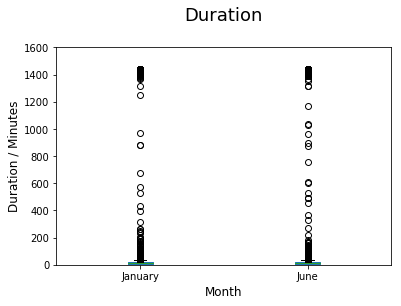

In [9]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

# Duration boxplot of both months

duration_data = pd.concat([Jan_dataframe['Duration'].rename('January'), June_dataframe['Duration'].rename('June')], axis=1)
duration_data.plot(kind = 'box')
plt.title('Duration\n', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Duration / Minutes', fontsize = 12)
yrange = pylab.ylim([0,1600])

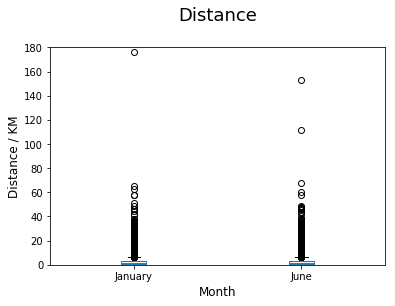

In [10]:
# trip distance boxplot of both months

distance_data = pd.concat([Jan_dataframe['Trip_distance'].rename('January'), June_dataframe['Trip_distance'].rename('June')], axis=1)
distance_data.plot(kind = 'box')
plt.title('Distance\n', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Distance / KM', fontsize = 12)
yrange = pylab.ylim([0,180])

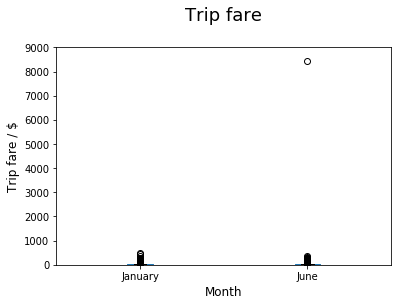

In [11]:
# payment amount boxplot of both months

payment_data = pd.concat([Jan_dataframe['Payment_amount'].rename('January'), June_dataframe['Payment_amount'].rename('June')], axis=1)
payment_data.plot(kind = 'box')
plt.title('Trip fare\n', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Trip fare / $', fontsize = 12)
yrange = pylab.ylim([0,9000])

In [12]:
# Answer to 1.4

In [13]:
# Answer to 1.4.1

In [14]:
# 'Normal' range of trip duration

# Upper boundary of normal range is chosen as 3 IQR above the third quartile, for data that fall out of
# this range are outliers, and suspected outliers are included in order to reasonably maximise sample size.
# Lower boundary is not selected by 3 IQR below the first quartile, for this will yield negative data which
# is unacceptable and unpractical for the purpose of this data analysis. An acceptable bound would be greater than zero.

duration_q3 = Jan_dataframe['Duration'].quantile(.75)
duration_q1 = Jan_dataframe['Duration'].quantile(.25)
duration_IQR = duration_q3 - duration_q1
duration_outlier1 = duration_q3 + 3 * duration_IQR
duration_outlier0 = 0

In [15]:
# 'Normal' range of trip distance

# Similar to trip duration, the normal range of trip distance is determined by the same criteria.
# Upper boundary is 3 IQR above the third quartile. Lower boundary is obviously non-negative.

distance_q3 = Jan_dataframe['Trip_distance'].quantile(.75)
distance_q1 = Jan_dataframe['Trip_distance'].quantile(.25)
distance_IQR = distance_q3 - distance_q1
distance_outlier1 = distance_q3 + 3 * distance_IQR
distance_outlier0 = 0 

In [16]:
# 'Normal' range of passenger count

# Similar to trip duration, the normal range of passenger count is determined by similar criteria.
# Upper boundary is 3 IQR above the third quartile, which is 5 exactly. Moreover, the NYC government website 
# states that there are only 4-passenger vehicles and 5-passenger vehicles in NYC, and the regulation 
# states that maximum is 5 passengers in one vehicle. Lower boundary is 1 because it would be foolish
# to have a trip without any passenger, or nobody is paying for the trip, so 0 is an outlier.

passenger_q3 = Jan_dataframe['Passenger_count'].quantile(.75)
passenger_q1 = Jan_dataframe['Passenger_count'].quantile(.25)
passenger_IQR = passenger_q3 - passenger_q1
passenger_outlier1 = passenger_q3 + 3 * passenger_IQR
passenger_outlier0 = 1

In [17]:
# 'Normal' range of payment amount

# Similar to trip duration, the normal range of payment amount is determined by the same criteria.
# Upper boundary is 3 IQR above the third quartile. Lower boundary is obviously non-negative.

payment_q3 = Jan_dataframe['Payment_amount'].quantile(.75)
payment_q1 = Jan_dataframe['Payment_amount'].quantile(.25)
payment_IQR = payment_q3 - payment_q1
payment_outlier1 = payment_q3 + 3 * payment_IQR
payment_outlier0 = 0

In [18]:
# Answer to 1.4.2

In [19]:
print(92 * '*') # to keep same amount of stars identical to the specification

# calculate the ratio of nosiy data given a normal data range

def noisy_ratio(data, data_name, data_range):
    count = 0
    for i in data:
        if i > data_range[1] or i < data_range[0]:
            count+=1
    ratio = count / len(data)
    print('{:4.2f}%'.format(ratio * 100), 'of instances in \'' + data_name + '\' are Noisy! (normal range is between {:4.2f} and {:4.2f})'.format(data_range[0], data_range[1]))
    return

# call this function multiple times to get nosiy ratio for different columns

noisy_ratio(Jan_dataframe['Duration'], 'Duration', [duration_outlier0, duration_outlier1])
noisy_ratio(Jan_dataframe['Trip_distance'], 'Trip_distance', [distance_outlier0, distance_outlier1])
noisy_ratio(Jan_dataframe['Passenger_count'], 'Passenger_count', [passenger_outlier0, passenger_outlier1])
noisy_ratio(Jan_dataframe['Payment_amount'], 'Payment_amount', [payment_outlier0, payment_outlier1])

print(90 * '*')


********************************************************************************************
1.21% of instances in 'Duration' are Noisy! (normal range is between 0.00 and 50.00)
6.21% of instances in 'Trip_distance' are Noisy! (normal range is between 0.00 and 9.28)
3.41% of instances in 'Passenger_count' are Noisy! (normal range is between 1.00 and 5.00)
4.89% of instances in 'Payment_amount' are Noisy! (normal range is between 0.00 and 43.74)
******************************************************************************************


In [20]:
# Answer to 1.4.3

In [21]:
# replace every nosiy data to the mean value of data without outliers

def noisy_to_mean(data, data_range):
    count = 0
    total = 0
    for i in data:
        if data_range[0] <= i <= data_range[1]:
            total += i
            count += 1
    new_mean = total / count
    for i in data:    
        if i > data_range[1] or i < data_range[0]:
            i = new_mean
    return data

In [22]:
noisy_to_mean(Jan_dataframe['Duration'], [duration_outlier0, duration_outlier1])

0          3.0
1         19.0
2          4.0
3          9.0
4         13.0
5         18.0
6         20.0
7         21.0
8         33.0
9         21.0
10        16.0
11        15.0
12         8.0
13         9.0
14         5.0
15        22.0
16        16.0
17        13.0
18        10.0
19         5.0
20        20.0
21         5.0
22        12.0
23         9.0
24         3.0
25        19.0
26         8.0
27        11.0
28        18.0
29         6.0
          ... 
109039     7.0
109040    18.0
109041    19.0
109042     8.0
109043    14.0
109044     2.0
109045    23.0
109046    11.0
109047     1.0
109048    15.0
109049     1.0
109050     6.0
109051     7.0
109052    11.0
109053    10.0
109054     7.0
109055    16.0
109056    19.0
109057     3.0
109058    16.0
109059    10.0
109060     9.0
109061     9.0
109062    21.0
109063     5.0
109064     9.0
109065    14.0
109066     8.0
109067     8.0
109068     6.0
Name: Duration, dtype: float64

In [23]:
noisy_to_mean(Jan_dataframe['Trip_distance'], [distance_outlier0, distance_outlier1])

0          0.56
1          3.55
2          0.60
3          3.20
4          2.64
5          3.53
6          6.44
7         15.75
8          6.90
9          4.71
10         2.63
11         3.40
12         1.40
13         1.39
14         1.30
15         3.05
16         2.44
17         2.25
18         1.92
19         1.21
20         5.00
21         0.45
22         2.80
23         1.50
24         0.90
25         7.75
26         1.30
27         3.30
28         6.59
29         1.20
          ...  
109039     3.82
109040     5.45
109041     9.66
109042     1.47
109043     3.87
109044     0.33
109045    12.30
109046     1.90
109047     0.41
109048     5.70
109049     0.60
109050     1.03
109051     2.40
109052     3.27
109053     2.00
109054     1.13
109055     4.20
109056    11.50
109057     0.80
109058     7.70
109059     2.14
109060     3.22
109061     2.65
109062     5.47
109063     1.06
109064     1.68
109065     7.70
109066     4.10
109067     2.50
109068     1.60
Name: Trip_distance, dty

In [24]:
noisy_to_mean(Jan_dataframe['Passenger_count'], [passenger_outlier0, passenger_outlier1])

0         1
1         1
2         1
3         2
4         3
5         1
6         1
7         1
8         3
9         2
10        1
11        1
12        2
13        1
14        2
15        2
16        5
17        5
18        2
19        2
20        2
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
109039    1
109040    5
109041    1
109042    1
109043    1
109044    1
109045    1
109046    1
109047    3
109048    1
109049    1
109050    2
109051    1
109052    1
109053    1
109054    6
109055    1
109056    1
109057    1
109058    1
109059    1
109060    5
109061    1
109062    1
109063    4
109064    2
109065    1
109066    1
109067    1
109068    1
Name: Passenger_count, dtype: int64

In [25]:
noisy_to_mean(Jan_dataframe['Payment_amount'],[payment_outlier0, payment_outlier1])

0          5.80
1         20.16
2          6.30
3         12.30
4         12.80
5         16.80
6         28.99
7         53.80
8         27.80
9         19.80
10        15.30
11        14.80
12         9.30
13        11.44
14         8.75
15        18.96
16        14.30
17        14.75
18        14.04
19         7.30
20        19.80
21         6.80
22        13.80
23        12.05
24         7.25
25        32.88
26         8.30
27        13.30
28        22.30
29         9.30
          ...  
109039    20.00
109040    21.30
109041    42.92
109042     8.30
109043    18.00
109044     4.80
109045    44.15
109046    10.80
109047     5.76
109048    20.80
109049     6.36
109050     7.30
109051    12.35
109052    14.30
109053    10.30
109054     8.30
109055    20.15
109056    33.30
109057     5.80
109058    36.99
109059    13.30
109060    15.36
109061    11.30
109062    24.36
109063     7.80
109064    11.76
109065    33.34
109066    14.80
109067    12.30
109068     8.30
Name: Payment_amount, dt

In [26]:
# Answer to 2.1

In [27]:
clean_Jan = pd.read_csv('clean-january.csv',  encoding = 'ISO-8859-1')

# convert pickup_datetime to timestamp

pickup_dt = pd.to_datetime(clean_Jan['pickup_datetime'], format='%d/%m/%y %H:%M')

In [28]:
# select 'isWeekend' data

weekend = [0 if date.weekday() < 5 else 1 for date in pickup_dt]
clean_Jan_dataframe = pd.DataFrame({'isWeekend': weekend})

# merge with existing data
clean_Jan_dataframe = clean_Jan.merge(right = clean_Jan_dataframe, left_index = True, right_index = True)

clean_Jan_dataframe

,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration,isWeekend
0,1/01/16 0:00,1/01/16 0:13,1.50,1,14.65,13,0
1,1/01/16 0:01,1/01/16 0:07,1.40,2,10.75,6,0
2,1/01/16 0:02,1/01/16 0:08,1.02,1,8.76,6,0
3,1/01/16 0:03,1/01/16 0:15,4.00,1,18.95,12,0
4,1/01/16 0:04,1/01/16 0:22,3.53,1,16.80,18,0
5,1/01/16 0:04,1/01/16 0:30,3.30,1,18.80,26,0
6,1/01/16 0:05,1/01/16 0:11,2.70,1,12.95,6,0
7,1/01/16 0:05,1/01/16 0:12,1.60,1,8.80,7,0
8,1/01/16 0:06,1/01/16 0:15,3.90,1,13.30,9,0
9,1/01/16 0:06,1/01/16 0:15,0.60,2,10.00,9,0


In [29]:
# count the number of weekend trips

def weekend_count(n):
    count = 0
    for i in n:
        if i == 1:
            count+=1
    percentage = 100 * count/len(n)        
    return percentage

    
print(66 * '*')
print('% of weekend trips={:4.2f}'.format(weekend_count(weekend)))
print(66 * '*')

******************************************************************
% of weekend trips=29.09
******************************************************************


In [30]:
# Answer to 2.2

In [31]:
# compute hour data and merge with existing dataframe

hour_data = pd.DataFrame({'hour': pickup_dt.dt.hour})

clean_Jan_dataframe = clean_Jan_dataframe.merge(right = hour_data, left_index = True, right_index = True)
clean_Jan_dataframe

,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration,isWeekend,hour
0,1/01/16 0:00,1/01/16 0:13,1.50,1,14.65,13,0,0
1,1/01/16 0:01,1/01/16 0:07,1.40,2,10.75,6,0,0
2,1/01/16 0:02,1/01/16 0:08,1.02,1,8.76,6,0,0
3,1/01/16 0:03,1/01/16 0:15,4.00,1,18.95,12,0,0
4,1/01/16 0:04,1/01/16 0:22,3.53,1,16.80,18,0,0
5,1/01/16 0:04,1/01/16 0:30,3.30,1,18.80,26,0,0
6,1/01/16 0:05,1/01/16 0:11,2.70,1,12.95,6,0,0
7,1/01/16 0:05,1/01/16 0:12,1.60,1,8.80,7,0,0
8,1/01/16 0:06,1/01/16 0:15,3.90,1,13.30,9,0,0
9,1/01/16 0:06,1/01/16 0:15,0.60,2,10.00,9,0,0


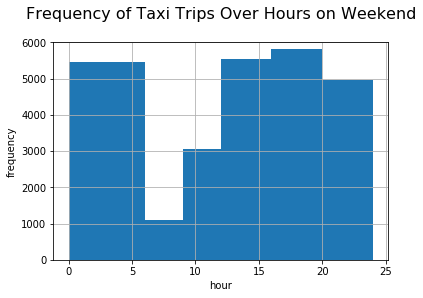

In [32]:
# select all hour data of weekend to plot a histogram of weekend trips frequency

weekend_data = clean_Jan_dataframe.loc[clean_Jan_dataframe["isWeekend"] == 1]

hour_bins = [0,6,9,12,16,20,24]

weekend_data['hour'].hist(bins = hour_bins)
plt.xlabel('hour')
plt.ylabel('frequency')
yrange = pylab.ylim([0,6000])
plt.title('Frequency of Taxi Trips Over Hours on Weekend\n', fontsize = 16)

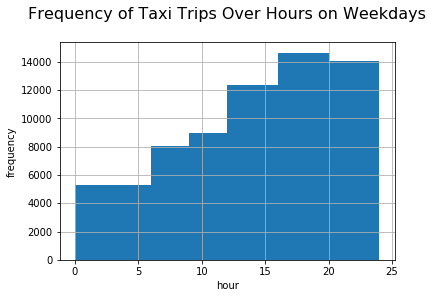

In [33]:
# select all hour data of weekday to plot a histogram of weekend trips frequency

weekday_data = clean_Jan_dataframe.loc[clean_Jan_dataframe["isWeekend"] == 0]

hour_bins = [0,6,9,12,16,20,24]

weekday_data['hour'].hist(bins = hour_bins)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('Frequency of Taxi Trips Over Hours on Weekdays\n', fontsize = 16)

In [34]:
# Answer to 2.3

In [35]:
# create a new column 'income_efficiency' and merge with existing dataframe

income_efficiency_data = pd.DataFrame({'income efficiency': clean_Jan_dataframe['payment_amount']/clean_Jan_dataframe['duration']})
clean_Jan_dataframe = clean_Jan_dataframe.merge(right = income_efficiency_data, left_index = True, right_index = True)
clean_Jan_dataframe

,pickup_datetime,dropoff_datetime,trip_distance,passenger_count,payment_amount,duration,isWeekend,hour,income efficiency
0,1/01/16 0:00,1/01/16 0:13,1.50,1,14.65,13,0,0,1.126923
1,1/01/16 0:01,1/01/16 0:07,1.40,2,10.75,6,0,0,1.791667
2,1/01/16 0:02,1/01/16 0:08,1.02,1,8.76,6,0,0,1.460000
3,1/01/16 0:03,1/01/16 0:15,4.00,1,18.95,12,0,0,1.579167
4,1/01/16 0:04,1/01/16 0:22,3.53,1,16.80,18,0,0,0.933333
5,1/01/16 0:04,1/01/16 0:30,3.30,1,18.80,26,0,0,0.723077
6,1/01/16 0:05,1/01/16 0:11,2.70,1,12.95,6,0,0,2.158333
7,1/01/16 0:05,1/01/16 0:12,1.60,1,8.80,7,0,0,1.257143
8,1/01/16 0:06,1/01/16 0:15,3.90,1,13.30,9,0,0,1.477778
9,1/01/16 0:06,1/01/16 0:15,0.60,2,10.00,9,0,0,1.111111


In [36]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

# calculate mean income efficiency of all hours
mean_efficiency = []
for i in range(0,24):
    mean_efficiency.append((clean_Jan_dataframe.loc[clean_Jan_dataframe['hour'] == i])['income efficiency'].mean())


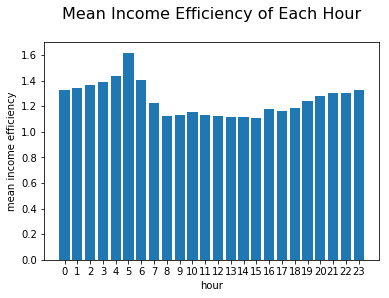

In [37]:
x = np.arange(0, 24);
y = mean_efficiency

# plot a bar chart of hourly mean income efficiency data
plt.bar(x, y)
plt.title("Mean Income Efficiency of Each Hour\n", fontsize=16)
plt.xticks(arange(24))
plt.xlabel('hour')
plt.ylabel('mean income efficiency')
